In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('combine_19_20_21_sale.xlsx')

In [3]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.columns

Index(['Created Date', 'TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales',
       'Zip_income', 'Income'],
      dtype='object')

In [6]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [7]:
df=df.drop(['Created Date'],axis=1)

In [8]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [9]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [10]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [11]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [12]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [13]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [14]:
df1=df1.drop_duplicates(ignore_index=True)

<AxesSubplot:>

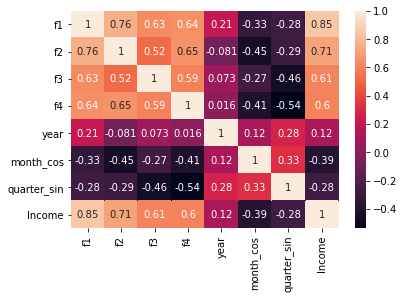

In [15]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [16]:
train=df1[0:600]
test=df1[600:]

In [17]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# creating linear regression model

reg_model=LinearRegression(normalize=True)

In [21]:
# fit independent varaibles to the dependent variables
reg_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [28]:
reg_model.score(X_train,y_train)

0.6608454480493886

In [29]:
reg_model.score(X_test,y_test)

0.756207696481829

In [30]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [31]:
reg_model.score(X_,y_)

0.6772884180737875

In [32]:
df.tail()

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos,f1,f2,f3,f4
721,81,222,126,3494.939333,210099.11,210099.11,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.0,46642002.42,1.156030e+07,3.674692,15.884686
722,68,168,75,4079.521639,119775.95,119775.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.0,20122359.60,8.883276e+06,4.301227,15.220505
723,69,202,124,3481.447857,230699.43,230699.43,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.0,46601284.86,9.995096e+06,3.077142,15.356453
724,68,109,75,4314.042857,112431.95,112431.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.0,12255082.55,4.909352e+06,1.780052,15.004197
725,63,177,114,3539.839216,199708.63,199708.63,2,0.500000,-0.866025,0.085965,0.996298,0.433884,-0.900969,1.224647e-16,-1.0,35348427.51,8.335726e+06,2.627056,15.017479


In [33]:
y_pred=reg_model.predict(X_)

In [34]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

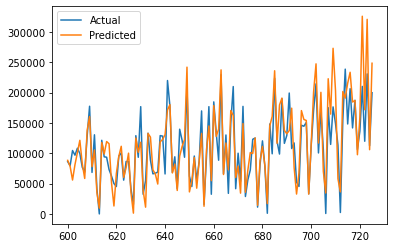

In [35]:
comp.plot()

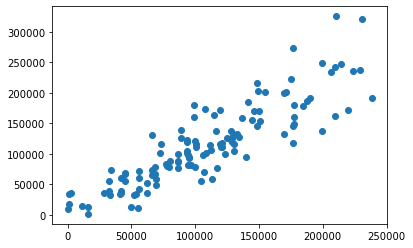

In [36]:
plt.scatter(y_,y_pred)

In [37]:
from sklearn import metrics

In [38]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 32231.74761400049
MAE: 23223.00257930056


# Ridge

In [39]:
y_.median()

102591.935

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [41]:
# Intializig ridge model
reg_model_1=Ridge()

In [42]:
# lamda parameter range 

hyperparameter_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [43]:
# Searching best hyperparameter using gridsearch 

ridge_reg=GridSearchCV(reg_model_1,hyperparameter_range,scoring='neg_root_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [44]:
# Best lamda
ridge_reg.best_params_

{'alpha': 1e-15}

In [45]:
# error value 
ridge_reg.best_score_

-36067.582659031774

In [46]:
reg_model_2=Ridge(alpha=1e-15)

In [47]:
reg_model_2.fit(X_train,y_train)

Ridge(alpha=1e-15)

In [48]:
reg_model_2.score(X_train,y_train)

0.6608454480493887

In [49]:
reg_model_2.score(X_test,y_test)

0.756207696481829

In [50]:
reg_model_2.score(X_,y_)

0.6772884180737868

In [51]:
y_pre_1=reg_model_2.predict(X_)

In [52]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

RMSE: 32231.747614000527
MAE: 23223.00257930059


# Lasso

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [54]:
# Intializing the model 
reg_model_3=Lasso()

In [55]:
# hyper parameter range 
hyperparameters_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [56]:
# Searching best hyper parameter 

lasso_reg=GridSearchCV(reg_model_3,hyperparameters_range,scoring='neg_root_mean_squared_error',cv=5)

lasso_reg.fit(X,y)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313629897648.33685, tolerance: 202063752.78137138
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278194776905.8191, tolerance: 176646592.00760996
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270928822418.53577, tolerance: 177967054.86303928
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [57]:
#best parameters
lasso_reg.best_params_

{'alpha': 1e-15}

In [58]:
#best score
lasso_reg.best_score_

-36067.58265903178

In [59]:
lasso_pre=Lasso(alpha=1e-15)

In [60]:
lasso_pre.fit(X_train,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311558948691.02075, tolerance: 183726827.17090344
  positive)


Lasso(alpha=1e-15)

In [61]:
lasso_pre.score(X_train,y_train)

0.6608454480493886

In [62]:
lasso_pre.score(X_test,y_test)

0.7562076964818291

In [63]:
lasso_pre.score(X_,y_)

0.6772884180737873

In [64]:
y_pre_2=lasso_pre.predict(X_)

In [65]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

RMSE: 32231.747614000506
MAE: 23223.002579300577


In [66]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pre_1})

In [67]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pre_2})

<AxesSubplot:title={'center':'Lasso Regression'}>

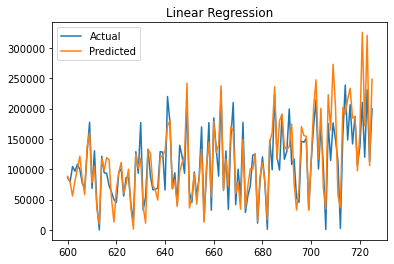

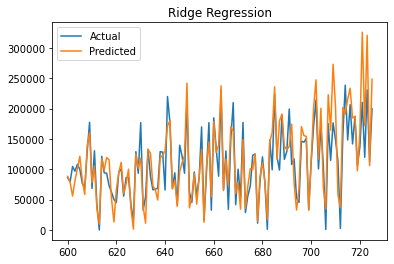

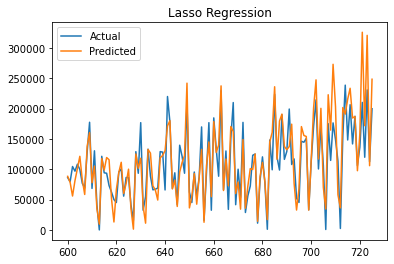

In [68]:
#comparision 
comp.plot(title='Linear Regression')
comp_1.plot(title='Ridge Regression')
comp_2.plot(title='Lasso Regression')

In [69]:
print('====Linear Regression========')
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


print('====Ridge Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

print('====Lasso Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

====Linear Regression========
RMSE: 32231.74761400049
MAE: 23223.00257930056
====Ridge Regression========
RMSE: 32231.747614000527
MAE: 23223.00257930059
====Lasso Regression========
RMSE: 32231.747614000506
MAE: 23223.002579300577
